# Job Recommendation JobMate

# **Data Preparation**

In [26]:
!gdown 1yF3Lye2X5rwXfXxXB_xg2WIi1Tjyalhm -O job.zip
!gdown 1udgT1OHVLAIe5FcczaxP4PONFmuRp8Y2 -O resume.zip

import zipfile

# Ekstrak job.zip
with zipfile.ZipFile("job.zip", 'r') as zip_ref:
    zip_ref.extractall("data/job")

# Ekstrak resume.zip
with zipfile.ZipFile("resume.zip", 'r') as zip_ref:
    zip_ref.extractall("data/resume")

Downloading...
From (original): https://drive.google.com/uc?id=1yF3Lye2X5rwXfXxXB_xg2WIi1Tjyalhm
From (redirected): https://drive.google.com/uc?id=1yF3Lye2X5rwXfXxXB_xg2WIi1Tjyalhm&confirm=t&uuid=3fee4868-0594-4d24-a852-bb9f3ad0fb31
To: /content/job.zip
100% 480M/480M [00:07<00:00, 65.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1udgT1OHVLAIe5FcczaxP4PONFmuRp8Y2
To: /content/resume.zip
100% 392k/392k [00:00<00:00, 6.75MB/s]


In [27]:
import os
print(os.listdir('data/job'))

['job_descriptions.csv']


In [28]:
import os
print(os.listdir('data/resume'))

['UpdatedResumeDataSet.csv']


In [29]:
import pandas as pd

# Load file dari path yang benar
job_df = pd.read_csv('data/job/job_descriptions.csv')
resume_df = pd.read_csv('data/resume/UpdatedResumeDataSet.csv')

# Pastikan kolom yang diambil sesuai dengan isi file
job_df = job_df[['Job Title', 'Job Description']].dropna().reset_index(drop=True)
resume_df = resume_df[['Resume', 'Category']].dropna().reset_index(drop=True)

# Cek jumlah data
print("Jumlah lowongan:", len(job_df))
print("Jumlah resume:", len(resume_df))

# Tampilkan
job_df.head()

Jumlah lowongan: 1615940
Jumlah resume: 962


,Job Title,Job Description
0,Digital Marketing Specialist,Social Media Managers oversee an organizations...
1,Web Developer,Frontend Web Developers design and implement u...
2,Operations Manager,Quality Control Managers establish and enforce...
3,Network Engineer,"Wireless Network Engineers design, implement, ..."
4,Event Manager,A Conference Manager coordinates and manages c...


# Data Preprocessing

In [30]:
import re

def basic_preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [31]:
job_df['Cleaned Description'] = job_df['Job Description'].apply(basic_preprocess)
resume_df['Cleaned Resume'] = resume_df['Resume'].apply(basic_preprocess)

# Cek hasil sample
print(resume_df['Cleaned Resume'][0][:300])
print(job_df['Cleaned Description'][0][:300])

skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduct
social media managers oversee an organizations social media presence they create and schedule content engage with followers and analyze social media metrics to drive brand awareness and engagement


In [32]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(max_features=5000)
job_vectors = vectorizer.fit_transform(job_df['Cleaned Description'])
resume_vector = vectorizer.transform([resume_df['Cleaned Resume'][0]])

In [33]:
# Similarity
similarities = cosine_similarity(resume_vector, job_vectors).flatten()
top_indices = similarities.argsort()[-5:][::-1]
top_jobs = job_df.iloc[top_indices].copy()
top_jobs['Similarity Score'] = similarities[top_indices]

**Pengujian**

In [34]:
# Menampilkan hasil rekomendasi dengan skor similarity
for idx, row in top_jobs.iterrows():
    print(f"--- Rekomendasi ---")
    print(f"Job Title        : {row['Job Title']}")
    print(f"Similarity Score : {row['Similarity Score']:.4f}")
    print(f"Job Description  : {row['Job Description'][:200]}...\n")

--- Rekomendasi ---
Job Title        : Data Analyst
Similarity Score : 0.2557
Job Description  : Data Scientists use their expertise in data analysis and machine learning to extract valuable insights and predictions from data. They build and train models, conduct statistical analysis, and communi...

--- Rekomendasi ---
Job Title        : Data Analyst
Similarity Score : 0.2557
Job Description  : Data Scientists use their expertise in data analysis and machine learning to extract valuable insights and predictions from data. They build and train models, conduct statistical analysis, and communi...

--- Rekomendasi ---
Job Title        : Data Analyst
Similarity Score : 0.2557
Job Description  : Data Scientists use their expertise in data analysis and machine learning to extract valuable insights and predictions from data. They build and train models, conduct statistical analysis, and communi...

--- Rekomendasi ---
Job Title        : Data Analyst
Similarity Score : 0.2557
Job Description 

In [35]:
dummy_resume = """
I have experience in data analysis using Python, SQL, and Excel.
I also build dashboards using Tableau and have knowledge of statistics, machine learning, and business intelligence.
"""

# Preprocess dummy resume
dummy_resume_cleaned = basic_preprocess(dummy_resume)

# Vectorize dummy resume
dummy_vector = vectorizer.transform([dummy_resume_cleaned])

# Hitung similarity
dummy_similarities = cosine_similarity(dummy_vector, job_vectors).flatten()
top_dummy_indices = dummy_similarities.argsort()[-5:][::-1]
top_dummy_jobs = job_df.iloc[top_dummy_indices].copy()
top_dummy_jobs['Similarity Score'] = dummy_similarities[top_dummy_indices]

# Tampilkan hasilnya
for idx, row in top_dummy_jobs.iterrows():
    print(f"--- Dummy Resume Rekomendasi ---")
    print(f"Job Title        : {row['Job Title']}")
    print(f"Similarity Score : {row['Similarity Score']:.4f}")
    print(f"Job Description  : {row['Job Description'][:200]}...\n")

--- Dummy Resume Rekomendasi ---
Job Title        : Database Developer
Similarity Score : 0.2528
Job Description  : SQL Database Developers design, implement, and maintain relational databases using SQL (Structured Query Language). They write queries, optimize database performance, and ensure data integrity and sec...

--- Dummy Resume Rekomendasi ---
Job Title        : Database Developer
Similarity Score : 0.2528
Job Description  : SQL Database Developers design, implement, and maintain relational databases using SQL (Structured Query Language). They write queries, optimize database performance, and ensure data integrity and sec...

--- Dummy Resume Rekomendasi ---
Job Title        : Database Developer
Similarity Score : 0.2528
Job Description  : SQL Database Developers design, implement, and maintain relational databases using SQL (Structured Query Language). They write queries, optimize database performance, and ensure data integrity and sec...

--- Dummy Resume Rekomendasi ---
Job 

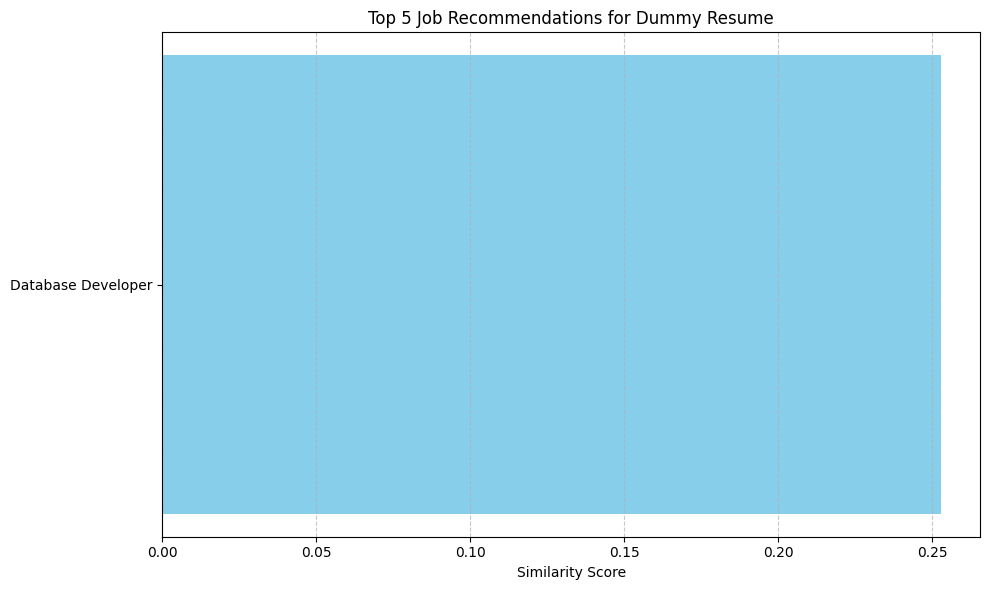

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_dummy_jobs['Job Title'], top_dummy_jobs['Similarity Score'], color='skyblue')
plt.xlabel("Similarity Score")
plt.title("Top 5 Job Recommendations for Dummy Resume")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
# === Save to .pkl and .npz ===
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

sparse.save_npz("job_vectors.npz", job_vectors)
job_df[['Job Title', 'Job Description', 'Cleaned Description']].to_csv("job_metadata.csv", index=False)

print("✅ Saved tfidf_vectorizer.pkl, job_vectors.npz, and job_metadata.csv")

✅ Saved tfidf_vectorizer.pkl, job_vectors.npz, and job_metadata.csv


Supervised

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(resume_df['Cleaned Resume'])
y = resume_df['Category']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

In [39]:
import pickle

# Simpan vectorizer ke file .pkl
with open("supervised_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Simpan model Logistic Regression ke file .pkl
with open("job_classifier.pkl", "wb") as f:
    pickle.dump(clf, f)

print("✅ Model dan vectorizer berhasil disimpan sebagai .pkl")

✅ Model dan vectorizer berhasil disimpan sebagai .pkl


unsupervised
- cosine similarity → untuk rekomendasi job mirip

supervised
- logistic regression → untuk klasifikasi jenis pekerjaan